# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & PID

- Name: WEIYUAN XU
- PID: U08448717

# Research Question

What is the relationship between the restaurant's violations and restaurant's yelp ratings and ecomonic development in a specific place?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*My hypothesis is that if the restaurants open earlier, then it may have more violation. So we must consider the time.*
*Besides, we should see the corraltion of the rating and the violations*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest



# Data Cleaning

Firstly, we should have a basic idea about our data. I will see the datasets in the following cells

In [2]:
inspections_data = pd.read_csv('inspections.csv')
print(inspections_data.columns)
inspections_data

Index(['hsisid', 'date', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus', 'zip',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')


,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,4092110151,2012-09-21T00:00:00Z,Wake Forest Elem. Sch. Cafeteria,136 W Sycamore St,NaN,wake forest,NC,27587,(919) 554-8671,2004-08-25T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,...,7,NaN,NaN,NaN,NaN,3.000000,6.400000,4.092014e+09,4.092016e+09,1
7,4092013281,2012-09-24T00:00:00Z,Taste Of China,1321 5TH AVE,NaN,garner,NC,27529-3637,(919) 779-7727,2001-02-19T00:00:00Z,...,14,NaN,NaN,NaN,NaN,3.000000,6.400000,4.092015e+09,4.092014e+09,1
8,4092110005,2012-09-24T00:00:00Z,Farmington Woods Elem. Cafeteria,1413 HAMPTON VALLEY RD,NaN,cary,NC,27511-4548,(919) 460-3476,1991-09-17T00:00:00Z,...,2,NaN,NaN,NaN,NaN,3.000000,6.400000,4.092016e+09,4.092014e+09,1
9,4092160070,2012-09-24T00:00:00Z,SUNRISE OF CARY FOODSERVICE,1206 W CHATHAM ST,NaN,cary,NC,27513,(919) 462-9147,2009-04-16T00:00:00Z,...,7,NaN,NaN,NaN,NaN,3.000000,6.400000,4.092016e+09,4.092014e+09,1


In [3]:
restaurants_data = pd.read_csv('restaurants.csv')
print(restaurants_data.columns)
restaurants_data

Index(['X.objectid', 'hsisid', 'name', 'address1', 'address2', 'city', 'state',
       'postalcode', 'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'],
      dtype='object')


,X.objectid,hsisid,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,facilitytype,x,y,geocodestatus
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,NaN,RALEIGH,NC,27616-1895,(919) 977-3679,2016-05-26T00:00:00.000Z,Restaurant,-78.591634,35.855487,M
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,NaN,APEX,NC,27502,NaN,2016-07-01T00:00:00.000Z,Pushcarts,-78.855348,35.730219,M
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,NaN,WAKE FOREST,NC,27587,(919) 554-4924,2005-12-05T00:00:00.000Z,Restaurant,-78.536145,35.946695,M
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,NaN,RALEIGH,NC,27601,(919) 835-3553,2009-02-04T00:00:00.000Z,Restaurant,-78.636895,35.777999,M
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,NaN,ZEBULON,NC,27597,NaN,2009-02-18T00:00:00.000Z,Institutional Food Service,-78.332138,35.816779,M
5,1006,4092110477,CHARLES BUGG CAFETERIA,825 COOPER ST,NaN,RALEIGH,NC,27610,(919) 250-4756,2009-02-26T00:00:00.000Z,Public School Lunchrooms,-78.586171,35.765199,M
6,1007,4092016679,BITTERSWEET,16 E MARTIN ST,NaN,RALEIGH,NC,27601,(919) 977-3829,2014-04-23T00:00:00.000Z,Restaurant,-78.640023,35.777143,M
7,1008,4092014493,Chick-fil-A #1573,8901 Brier Creek PKY,NaN,RALEIGH,NC,27617,(919) 293-0100,2006-01-31T00:00:00.000Z,Restaurant,-78.790500,35.901065,M
8,1009,4092015519,GOLDEN CHINA CHINESE RESTAURANT,2432 SW CARY PKY,NaN,CARY,NC,27513,(919) 380-7891,2009-11-24T00:00:00.000Z,Restaurant,-78.820859,35.763640,M
9,1010,4092010037,Aubrey & Peedi`s Grill,38 N Main St,PO BOX 302,WENDELL,NC,27591,(919) 365-5528,1991-04-25T00:00:00.000Z,Restaurant,-78.369452,35.782462,M


In [4]:
violations_data = pd.read_csv('violations.csv')
print(violations_data.columns)
violations_data

Index(['X.objectid', 'hsisid', 'inspectdate', 'category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'],
      dtype='object')


,X.objectid,hsisid,inspectdate,category,statecode,critical,questionno,violationcode,severity,shortdesc,inspectedby,comments,pointvalue,observationtype,violationtype,count,cdcriskfactor,cdcdataitem
0,2149,4092015279,2014-09-22T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,R,NaN,NaN,NaN
1,2150,4092014572,2014-09-29T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Daryl Beasley,7-102.11; Priority Foundation; One sanitizer b...,0,Out,CDI,NaN,NaN,NaN
2,2151,4092015906,2014-10-01T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found an unlab...,1,Out,CDI,NaN,NaN,NaN
3,2152,4092013840,2014-10-08T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
4,2153,4092021788,2014-10-09T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found one unla...,0,Out,CDI,NaN,NaN,NaN
5,2154,4092021580,2015-07-17T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Naterra McQueen,7-102.11; Priority Foundation; Label all spray...,1,Out,CDI,NaN,NaN,NaN
6,2155,4092021608,2015-07-20T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",David Adcock,7-102.11; The bleach water was not labeled. La...,0,Out,NaN,NaN,NaN,NaN
7,2156,4092010287,2015-07-20T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Lucy Schrum,7-102.11; Priority Foundation - Found unlabele...,0,Out,CDI,NaN,NaN,NaN
8,2157,4092014996,2015-07-21T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Laura McNeill,7-102.11; Priority Foundation; one bottle of s...,1,Out,CDI,NaN,NaN,NaN
9,2158,4092015246,2015-07-27T00:00:00.000Z,Chemical,".2653,.2657",Yes,26,7-102.11,Priority Foundation,"Toxic substances properly identified, stored, ...",Laura McNeill,7-102.11; Priority Foundation; two chemical bo...,1,Out,R,NaN,NaN,NaN


In [5]:
yelp_data = pd.read_csv('yelp.csv')
print(yelp_data.columns)
yelp_data

Index(['id', 'name', 'is_closed', 'rating', 'review_count', 'address1',
       'zip_code', 'latitude', 'longitude', 'price', 'phone', 'hotdogs',
       'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
       'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
       'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
       'sushi'],
      dtype='object')


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False
5,trent-restaurant-pollocksville,trent restaurant,False,5.0,5,129 Main St,28573,35.007890,-77.219700,$$$,...,False,False,False,False,False,False,False,False,False,False
6,bailey-cafe-bailey-2,bailey cafe,False,4.5,10,12544 Hanover St,27807,35.778950,-78.118400,$,...,False,False,False,False,False,False,False,False,False,False
7,bojangles-wilson-2,bojangles,False,3.5,21,5033 Raleigh Rd Pkwy W,27896,35.763565,-78.008926,$,...,False,False,False,False,False,False,False,False,False,False
8,el-tapatio-mexican-restaurant-wilson-2,el tapatio mexican restaurant,False,3.5,15,2921 Raleigh Road Pkwy W,27896,35.738403,-77.956024,$$,...,False,False,False,False,False,False,False,False,False,False
9,best-n-burgers-wilson,best-n-burgers,False,4.5,69,4916 Hayes Pl,27893,35.762290,-78.007200,$,...,False,False,False,False,False,False,False,False,False,False


In [6]:
zipcodes_data = pd.read_csv('zipcodes.csv')
zipcodes_data

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
5,27519,137193,121815,45778,3.2,2.3,2.3,35.2
6,27520,67939,58455,25628,5.0,7.8,2.4,23.5
7,27522,66250,59221,25513,6.0,7.0,4.2,31.4
8,27523,89184,68342,36976,3.1,3.1,1.8,22.4
9,27526,74666,66025,28074,8.4,8.3,3.9,22.5


Then we only find the columns we need in the dataset to analysis them and verify our hypothesis

In [7]:
new_yelp_data = yelp_data.drop(['is_closed', 'latitude', 'latitude', 'longitude', 'price', 'phone', 'hotdogs',
       'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery',
       'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican',
       'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries',
       'sushi'], axis = 1)

In [8]:
# And according to the hypothesis, if we have enough samples, we could get a relative fair rating of the restaurants.
# If the review_count is greater than 30, we will use the data, otherwise, those data will not be included in my new dataset

new_yelp_data


# Now we get 2832 samples which could be analysised in our project

,id,name,rating,review_count,address1,zip_code
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,2.5,23,2400 John Brantley Blvd,27560
1,aldi-foods-cary,aldi foods,4.0,17,2303 NW Maynard Rd,27519
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,5.0,2,Crabtree Valley Mall,27612
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,3.0,16,3401 Raleigh Rd Pkwy W,27893
4,subway-wilson-4,subway,3.5,3,4934 Raleigh Rd,27896
5,trent-restaurant-pollocksville,trent restaurant,5.0,5,129 Main St,28573
6,bailey-cafe-bailey-2,bailey cafe,4.5,10,12544 Hanover St,27807
7,bojangles-wilson-2,bojangles,3.5,21,5033 Raleigh Rd Pkwy W,27896
8,el-tapatio-mexican-restaurant-wilson-2,el tapatio mexican restaurant,3.5,15,2921 Raleigh Road Pkwy W,27896
9,best-n-burgers-wilson,best-n-burgers,4.5,69,4916 Hayes Pl,27893


In [9]:
new_inspections_data = inspections_data.drop(['address2', 'city', 'state',
       'phonenumber', 'restaurantopendate',
       'days_from_open_date', 'facilitytype', 'x', 'y', 'geocodestatus',
       'type', 'description', 'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      axis = 1 )
new_inspections_data.head()

,hsisid,date,name,address1,postalcode,zip
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,27610,27610
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,27610,27610
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,27610,27610
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,27513,27513
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,27597,27597


In [10]:
new_violations_data = violations_data.drop(['category', 'statecode',
       'critical', 'questionno', 'violationcode', 'severity', 'shortdesc',
       'inspectedby', 'comments', 'pointvalue', 'observationtype',
       'violationtype', 'count', 'cdcriskfactor', 'cdcdataitem'], axis = 1)
print(len(new_violations_data['hsisid'].unique()))
new_violations_data.head()


4270


,X.objectid,hsisid,inspectdate
0,2149,4092015279,2014-09-22T00:00:00.000Z
1,2150,4092014572,2014-09-29T00:00:00.000Z
2,2151,4092015906,2014-10-01T00:00:00.000Z
3,2152,4092013840,2014-10-08T00:00:00.000Z
4,2153,4092021788,2014-10-09T00:00:00.000Z


In [11]:
new_restaurants_data = restaurants_data.drop(['address2', 'city', 'state',
        'phonenumber', 'restaurantopendate', 'facilitytype', 'x',
       'y', 'geocodestatus'], axis = 1)
new_restaurants_data.head()

,X.objectid,hsisid,name,address1,postalcode
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895
1,1002,4092040338,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),309 HOLLOMAN ST,27502
2,1003,4092014444,Taco Bell #22798,2207 S MAIN ST,27587
3,1004,4092015333,THE REMEDY DINER,137 E HARGETT ST,27601
4,1005,4092160069,ZEBULON HOUSE (KITCHEN),551 PONY RD,27597


After we drop some columns that are not useful for our analysis, we could combine the dataset what we need.

Then we combine the restaurant data, yelp data and violation data together

In [26]:

my_health_data = pd.merge(new_restaurants_data, new_violations_data, on = ["hsisid"])
print(len(my_health_data['hsisid'].unique()))
my_health_data.head()



3199


,X.objectid_x,hsisid,name,address1,postalcode,X.objectid_y,inspectdate
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,6992,2016-10-12T00:00:00.000Z
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,7791,2016-09-13T00:00:00.000Z
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,7801,2016-10-12T00:00:00.000Z
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,10429,2016-09-13T00:00:00.000Z
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616-1895,15176,2016-09-13T00:00:00.000Z


In [13]:
my_health_and_rating_data = pd.merge(my_health_data, new_yelp_data, on = ['address1'])
my_health_and_rating_data

,X.objectid_x,hsisid,name_x,address1,postalcode,X.objectid_y,inspectdate,id,name_y,rating,review_count,zip_code
0,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,6975,2016-07-27T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
1,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,9133,2012-11-30T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
2,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,7492,2015-10-15T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
3,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,10307,2012-11-30T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
4,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,14176,2014-05-19T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
5,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,37693,2013-08-27T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
6,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,27961,2015-10-15T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
7,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,27962,2015-10-15T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
8,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,31334,2014-11-06T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513
9,1028,4092014271,Salvio`s Pizzeria,2428 SW Cary Pkwy,27513,34348,2014-11-06T00:00:00.000Z,salvios-pizzeria-cary,salvio's pizzeria,4.0,56,27513


Besides, we have also noticed that the length of postalcode is different in different rows. As a result, we should standradlize those codes
in the dataframe

In [25]:
for index, row in my_health_data.iterrows():
    if len(row['postalcode']) > 5 :
        my_health_data.at[index, 'postalcode'] = row['postalcode'][0:5]
my_health_data

,X.objectid_x,hsisid,name,address1,postalcode,X.objectid_y,inspectdate
0,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,6992,2016-10-12T00:00:00.000Z
1,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7791,2016-09-13T00:00:00.000Z
2,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,7801,2016-10-12T00:00:00.000Z
3,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,10429,2016-09-13T00:00:00.000Z
4,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,15176,2016-09-13T00:00:00.000Z
5,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,17583,2016-09-13T00:00:00.000Z
6,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,17621,2016-10-12T00:00:00.000Z
7,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,28257,2016-10-12T00:00:00.000Z
8,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,33880,2016-10-12T00:00:00.000Z
9,1001,4092017230,SPRING CAFE 2,2900-104 SPRING FOREST RD,27616,35627,2016-09-13T00:00:00.000Z


After we standardlize the dataset, we should also consider that in different regions, the amount of restaurants is also different. So we should average the total violations by the amount of restaurants in different regions.

In [21]:
my_health_data['postalcode'].unique()

array(['27616', '27587', '27601', '27597', '27610', '27617', '27513',
       '27591', '27612', '27526', '27606', '27603', '27609', '27520',
       '27502', '27545', '27613', '27604', '27529', '27614', '27511',
       '27607', '27540', '27615', '27608', '27605', '27602', '27539',
       '27560', '27512', '27518', '27519', '27695', '28277', '27571',
       '27592', '27652', '27709', '27623', '27579', '27501', '27523',
       '27595', '27573', '27619', '27562', '27628', '27596', '27522',
       '27263', '27514', '28587', '28145', '27624', '27650'], dtype=object)

In [23]:
zipcodes_data['zip'].unique()

array([27501, 27502, 27511, 27513, 27518, 27519, 27520, 27522, 27523,
       27526, 27529, 27539, 27540, 27545, 27560, 27562, 27571, 27587,
       27591, 27592, 27596, 27597, 27601, 27603, 27604, 27605, 27606,
       27607, 27608, 27609, 27610, 27612, 27613, 27614, 27615, 27616,
       27617, 27703], dtype=int64)

In previous cell, we have found that the postalcode in our 'my_health_data' dataset is at least a little different from that in the 'zipcodes_data' dataset. Then we have to deal with this issue and drop some restaurant's data if this restaurant's postalcode is not in the 'zipcodes_data' dataset.

In [ ]:
for index, row in my_health_data.iterrows():
    if len(row['postalcode']) > 5 :
        my_health_data.at[index, 'postalcode'] = row['postalcode'][0:5]
my_health_data

# Data Analysis & Results

The dataset 'my_health_data' combines the violation data, restaurants data and yelp data. Then we could analysis the correlation of the rating of the restaurants and violations of the restaurants

In [15]:
unique_id = my_health_and_rating_data['hsisid'].unique()
print(unique_id)
print(type(unique_id[0]))

[4092014271 4092021171 4092014288 4092021327 4092014315 4092013915
 4092014542 4092014604 4092014407 4092030175 4092011193 4092016715
 4092014031 4092014036 4092014076 4092021215 4092013966 4092013322
 4092013088 4092011976 4092010076 4092020976 4092020984 4092020992
 4092021007 4092010237 4092020237 4092011235 4092014002 4092010795
 4092013006 4092012067 4092013453 4092013971 4092010065 4092012004
 4092013542 4092020973 4092300151 4092010302 4092013811 4092300210
 4092021181 4092013955 4092021092 4092010625 4092014115 4092012896
 4092013962 4092013707 4092021203 4092021202 4092013897 4092013907
 4092012231 4092014225 4092021233 4092016291 4092021216 4092013714
 4092013673 4092300149]
<class 'numpy.int64'>


In [16]:
# Then we have some samples after combination
violations = my_health_and_rating_data['hsisid'].value_counts()
violations = violations.to_dict()
print(violations)
rating_data = dict(zip(my_health_and_rating_data['hsisid'], my_health_and_rating_data['rating']))
print(rating_data)

{4092013966: 692, 4092014407: 440, 4092014288: 262, 4092013907: 213, 4092010076: 208, 4092014036: 184, 4092014315: 165, 4092010237: 164, 4092013322: 148, 4092013915: 139, 4092012067: 133, 4092013971: 129, 4092011235: 126, 4092011193: 119, 4092012004: 112, 4092021202: 108, 4092014031: 107, 4092014604: 99, 4092013453: 96, 4092020976: 96, 4092010625: 93, 4092013707: 90, 4092021327: 87, 4092014002: 86, 4092013962: 86, 4092030175: 85, 4092014076: 82, 4092014271: 69, 4092013955: 68, 4092300210: 68, 4092010795: 68, 4092010302: 68, 4092013897: 66, 4092013006: 62, 4092021215: 60, 4092013811: 58, 4092013542: 57, 4092021007: 54, 4092020984: 54, 4092014225: 50, 4092010065: 50, 4092012896: 45, 4092021171: 42, 4092021181: 41, 4092014542: 41, 4092012231: 41, 4092021203: 40, 4092021216: 40, 4092300151: 37, 4092020973: 36, 4092014115: 36, 4092020992: 35, 4092013673: 35, 4092021092: 34, 4092016291: 33, 4092013088: 32, 4092021233: 27, 4092011976: 25, 4092300149: 25, 4092020237: 15, 4092016715: 10, 409201

In [17]:
x = []
y = []
# After we get the rating data, we could analysis the correlation between the two variables
for i in range(len(unique_id)):
    x.append(violations.get(unique_id[i]))
    y.append(rating_data.get(unique_id[i]))
print(x)
print(y)

[69, 42, 262, 87, 165, 139, 41, 99, 440, 85, 119, 10, 107, 184, 82, 60, 692, 148, 32, 25, 208, 96, 54, 35, 54, 164, 15, 126, 86, 68, 62, 133, 96, 129, 50, 112, 57, 36, 37, 68, 58, 68, 41, 68, 34, 93, 36, 45, 86, 90, 40, 108, 66, 213, 41, 50, 27, 33, 40, 8, 35, 25]
[4.0, 3.5, 3.5, 1.0, 1.0, 4.0, 3.0, 3.0, 4.0, 5.0, 3.5, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5, 3.5, 1.5, 4.0, 4.0, 4.0, 3.0, 2.5, 1.0, 3.5, 4.0, 3.0, 3.0, 4.0, 4.0, 2.5, 4.5, 4.0, 4.0, 1.5, 4.0, 4.0, 4.0, 4.5, 2.5, 3.5, 3.0, 3.5, 4.0, 4.5, 2.5, 2.5, 3.5, 3.5, 4.0, 4.0, 3.5, 3.5, 4.0, 1.5, 2.0, 4.0, 1.0, 4.0, 4.0, 3.5]


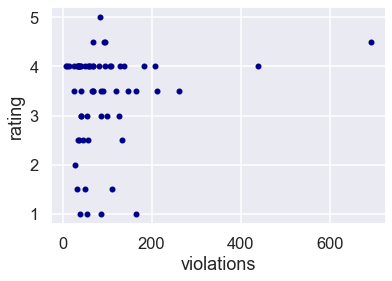

In [18]:
data_list = [x,y]
df = pd.DataFrame(data_list).transpose()
df.columns =  ['violations', 'rating']
df

ax1 = df.plot.scatter(x = 'violations',
                      y = 'rating',
                      c = 'DarkBlue')

In [20]:
#From the scatter plot above, we could get the conclusion that teh violations does not correlate with the rating of the restaurnats
#Then we compute the correlation
df.corr()

,violations,rating
violations,1.000000,0.162556
rating,0.162556,1.000000


Then we could get the conclusion that the correlation between the variable 'violations' and 'rating' is not really high. We could assume that
those two vatiables are almost independent

Include cells that describe the steps in your data analysis.

In [ ]:
#besides, we could analysis the correlation between the violations and economic development in a specific place
print((my_health_data['postalcode'].unique()))

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*